# IMDB - Cümleden Olumlu/Olumsuz Duygu Tahmini
------------
# IMDB Dataset

# Dataset'in İndirilmesi ve Ön işlem

In [ ]:
# Dataset'in çekilmesi, Numpy array'larla işlem yapabilmek ve ön işlem
# için gerekli kütüphanelerin import edilmesi
from keras.datasets import imdb
from keras import preprocessing
import numpy as np

In [ ]:
# Parametrelerin ayarlanması
# (En çook kullanılan 10000 kelime ve maksimum 20 kelimelik cümle uzunluğu)
max_features = 10000
maxlen = 20

In [ ]:
# Dataset'in çekilmesi
(x_train_base, y_train_base), (x_test_base, y_test_base) = imdb.load_data(num_words=max_features)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# (İlerde tekrar lazım olacağından dataset'i ilk haline gere getiren fonksiyon)
def getBaseData():
  return np.copy(x_train_base), np.copy(y_train_base), np.copy(x_test_base), np.copy(y_test_base)

In [ ]:
x_train, y_train, x_test, y_test = getBaseData()

In [ ]:
def resetData():
  x_train, y_train, x_test, y_test = getBaseData()

In [ ]:
# verilerin maxlen'e göre tekrar boyutlandırılması
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# İlk Modeli Oluşturma

In [ ]:
# Model için gerekli kütüphanelerin import edilmesi
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [ ]:
# Gömme (embedding) kullandığımız ilk temel modelin fonksiyonu,
# çağrılması ve compile edilmesi
def myModel():
  model = Sequential()

  model.add(Embedding(max_features, 8, input_length=maxlen))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
model = myModel()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

# Eğitme ve Başarımı Değerlendirme

In [ ]:
# Model'in eğitilmesi
# (validation data -> 0.2)
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.6591 - acc: 0.6471 - val_loss: 0.5980 - val_acc: 0.7054
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5253 - acc: 0.7574 - val_loss: 0.5167 - val_acc: 0.7328
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4558 - acc: 0.7905 - val_loss: 0.4972 - val_acc: 0.7448
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4228 - acc: 0.8079 - val_loss: 0.4927 - val_acc: 0.7544
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3997 - acc: 0.8199 - val_loss: 0.4948 - val_acc: 0.7550
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3803 - acc: 0.8310 - val_loss: 0.4975 - val_acc: 0.7528
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3619 - acc: 0.8409 - val_loss: 0.5014 - val_acc: 0.7524
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

In [ ]:
# Eğitimi görselleştirmek için gerekli kütüphanenin import edilmesi
import matplotlib.pyplot as plt

In [ ]:
# Başarım ve Kayıp grafiklerini çizdiren fonksiyon
def showAccAndLoss(arg_history):
    
    acc = arg_history.history['acc']
    val_acc = arg_history.history['val_acc']
    loss = arg_history.history['loss']
    val_loss = arg_history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Eğitim Başarımı')
    plt.plot(epochs, val_acc, 'b', label='Doğrulama Başarımı')
    plt.title('Eğitim ve Doğrulama Başarımı')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Eğitim Kaybı')
    plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
    plt.title('Eğitim ve Doğrulama Kaybı')
    plt.legend()
    
    plt.show()

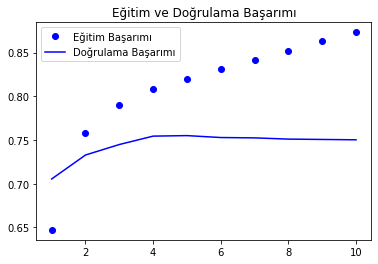

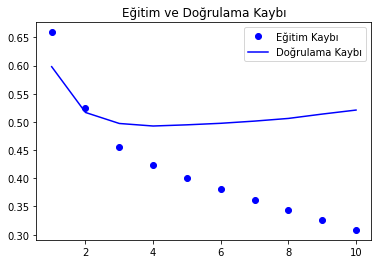

In [ ]:
# Grafiklerin çizdirilmesi
showAccAndLoss(history)

# RNN Kullanarak Model Oluşturma

In [ ]:
# Parametreleri güncelliyoruz
max_features = 10000
maxlen = 500

In [ ]:
# Base data'yı tekrar getiriyoruz
resetData()

In [ ]:
# Yeni parametreye göre örneklerin boyutlarının ayarlanması
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Model'de RNN'i kullanabilmek için gerekli kütüphanenin import edilmesi
from keras.layers import SimpleRNN

In [ ]:
# RNN kullanılan yeni embedding'li model
def myModel2():
  model = Sequential()

  model.add(Embedding(max_features, 32))
  model.add(SimpleRNN(32))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
model = myModel2()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

# Eğitme ve Başarımı Değerlendirme 2

In [ ]:
# RNN'li yeni modelin eğitilmesi
# (batch_size -> 128)
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 30s 183ms/step - loss: 0.6793 - acc: 0.5611 - val_loss: 0.6501 - val_acc: 0.6172
Epoch 2/10
157/157 [==============================] - 28s 181ms/step - loss: 0.5273 - acc: 0.7491 - val_loss: 0.5338 - val_acc: 0.7242
Epoch 3/10
157/157 [==============================] - 34s 218ms/step - loss: 0.4230 - acc: 0.8035 - val_loss: 0.5542 - val_acc: 0.7296
Epoch 4/10
157/157 [==============================] - 29s 182ms/step - loss: 0.3042 - acc: 0.8730 - val_loss: 0.6109 - val_acc: 0.7036
Epoch 5/10
157/157 [==============================] - 29s 182ms/step - loss: 0.3190 - acc: 0.8628 - val_loss: 0.5331 - val_acc: 0.7262
Epoch 6/10
157/157 [==============================] - 29s 184ms/step - loss: 0.4383 - acc: 0.8018 - val_loss: 0.6485 - val_acc: 0.7128
Epoch 7/10
157/157 [==============================] - 28s 180ms/step - loss: 0.2789 - acc: 0.8779 - val_loss: 0.7183 - val_acc: 0.7014
Epoch 8/10
157/157 [==============================] - 2

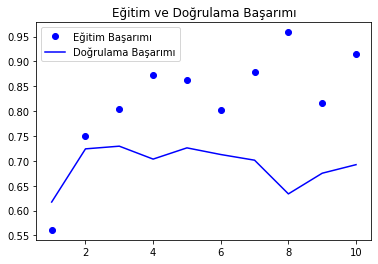

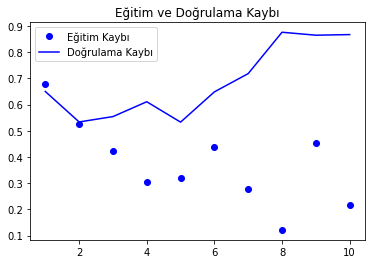

In [ ]:
showAccAndLoss(history)

# LSTM Kullanarak Model Oluşturma

In [ ]:
# Model'de LSTM'i kullanabilmek için gerekli kütüphanenin import edilmesi
from keras.layers import LSTM

In [ ]:
# LSTM kullanılan yeni embedding'li model
def myModel3():
  model = Sequential()

  model.add(Embedding(max_features, 32))
  model.add(LSTM(32))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
model = myModel3()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

# Eğitme ve Başarımı Değerlendirme

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 66s 405ms/step - loss: 0.5884 - acc: 0.6881 - val_loss: 0.5478 - val_acc: 0.7100
Epoch 2/10
157/157 [==============================] - 63s 398ms/step - loss: 0.4473 - acc: 0.7912 - val_loss: 0.5093 - val_acc: 0.7504
Epoch 3/10
157/157 [==============================] - 61s 391ms/step - loss: 0.3989 - acc: 0.8212 - val_loss: 0.6047 - val_acc: 0.7188
Epoch 4/10
157/157 [==============================] - 61s 388ms/step - loss: 0.3736 - acc: 0.8367 - val_loss: 0.5053 - val_acc: 0.7500
Epoch 5/10
157/157 [==============================] - 61s 388ms/step - loss: 0.3482 - acc: 0.8490 - val_loss: 0.5058 - val_acc: 0.7544
Epoch 6/10
157/157 [==============================] - 61s 390ms/step - loss: 0.3298 - acc: 0.8585 - val_loss: 0.5352 - val_acc: 0.7488
Epoch 7/10
157/157 [==============================] - 61s 388ms/step - loss: 0.3117 - acc: 0.8667 - val_loss: 0.5711 - val_acc: 0.7460
Epoch 8/10
157/157 [==============================] - 6

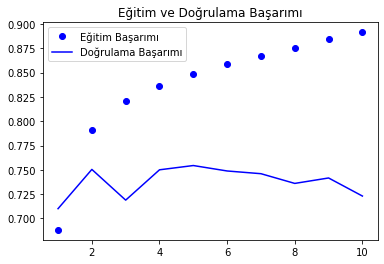

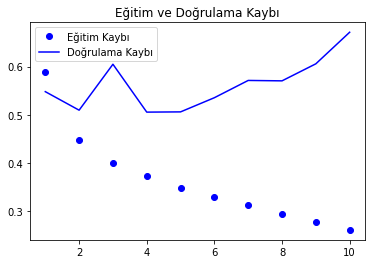

In [ ]:
showAccAndLoss(history)